**Cole Turner and Ethan Seal**

Fall 2019

CS 343: Neural Networks

Project 2: Multi-layer Perceptrons

**Draft due 11:59pm Thurs Sept 26**


Summary of files in this project:
- `softmax_layer.ipynb`
- `single_layer_net.py`
- `preprocess_data.py`
- `mlp.ipynb`
- `mlp.py`

**REMINDER**: Submit rubric on Google Classroom

In [20]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

# for obtaining the STL-dataset
import load_stl10_dataset

# for preprocessing dataset
import preprocess_data

# Set the color style so that Professor Layton can see your plots
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
# Make the font size larger
plt.rcParams.update({'font.size': 20})

# Turn off scientific notation when printing
np.set_printoptions(suppress=True, precision=3)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

### a. STL-10

**TODO**: Run the cell below, to preprocess STL-10 dataset like you did in the other notebook.

In [21]:
# Download the dataset from the internet, convert it to Numpy ndarray, resize to 32x32
# cache it locally on your computer for faster loading next time.
stl_imgs, stl_labels = load_stl10_dataset.load()

# Load in the string names for each class
classes = np.loadtxt(os.path.join('data', 'stl10_binary', 'class_names.txt'), dtype=str)

# Preprocess image pixel values for the MLP net
stl_imgs, stl_labels = preprocess_data.preprocess_stl(stl_imgs, stl_labels)
print(f'stl_imgs dtype is {stl_imgs.dtype} and it should be float64')
print(f'stl_imgs max is {np.max(stl_imgs[:, 1:]):.3f} and it should be 0.668')
print(f'stl_imgs shape is {stl_imgs.shape} and it should be (5000, 3072)')
print(f'stl_labels span {stl_labels.min()}->{stl_labels.max()} and it should be 0->9')
    
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.create_splits(stl_imgs, stl_labels)  
print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

Found cached numpy arrays the images and labels. Loading them...
Images are: (5000, 32, 32, 3)
Labels are: (5000,)
stl_imgs dtype is float64 and it should be float64
stl_imgs max is 0.668 and it should be 0.668
stl_imgs shape is (5000, 3072) and it should be (5000, 3072)
stl_labels span 0->9 and it should be 0->9
Train data shape:  (3500, 3072)
Train labels shape:  (3500,)
Test data shape:  (500, 3072)
Test labels shape:  (500,)
Validation data shape:  (500, 3072)
Validation labels shape:  (500,)
dev data shape:  (500, 3072)
dev labels shape:  (500,)


### Circle in a square

**TODO** Run the code below from the other notebook to load in the CIS dataset

In [23]:
val_size = 20

cis_train_path = os.path.join('data', 'cis', 'cis_train.dat')
cis_test_path = os.path.join('data', 'cis', 'cis_test.dat')

cis_train_all = np.loadtxt(cis_train_path, delimiter='\t')

# shuffle the data
s_inds = np.arange(len(cis_train_all))
cis_train_all = cis_train_all[s_inds]

cis_train_x = cis_train_all[:, :2]
cis_train_y = cis_train_all[:, 2].astype(int)

cis_val_x = cis_train_x[:val_size]
cis_train_x = cis_train_x[val_size:]
cis_val_y = cis_train_y[:val_size]
cis_train_y = cis_train_y[val_size:]

cis_test_all = np.loadtxt(cis_test_path, delimiter='\t')
cis_test_x = cis_test_all[:, :2]
cis_test_y = cis_test_all[:, 2].astype(int)

print ('CIS Train data shape: ', cis_train_x.shape)
print ('CIS Train labels shape: ', cis_train_y.shape)
print ('CIS Validation data shape: ', cis_val_x.shape)
print ('CIS Validation labels shape: ', cis_val_y.shape)
print ('CIS Test data shape: ', cis_test_x.shape)
print ('CIS Test labels shape: ', cis_test_y.shape)

CIS Train data shape:  (80, 2)
CIS Train labels shape:  (80,)
CIS Validation data shape:  (20, 2)
CIS Validation labels shape:  (20,)
CIS Test data shape:  (10000, 2)
CIS Test labels shape:  (10000,)


### b. Circle in a square dataset

**Properties:**
- 2 classes of features

**TODO**:
1. Download the circle in a square dataset. Folder structure is `<project folder>/data/cis/<cis dat files>`
2. Create numpy arrays for the train/test data and separate variables for the associated labels by running the below code

In [24]:
val_size = 20

cis_train_path = os.path.join('data', 'cis', 'cis_train.dat')
cis_test_path = os.path.join('data', 'cis', 'cis_test.dat')

cis_train_all = np.loadtxt(
cis_train_path, delimiter='\t')

cis_train_x = cis_train_all[:, :2]
cis_train_y = cis_train_all[:, 2].astype(int)

cis_val_x = cis_train_x[:val_size]
cis_train_x = cis_train_x[val_size:]
cis_val_y = cis_train_y[:val_size]
cis_train_y = cis_train_y[val_size:]

cis_test_all = np.loadtxt(cis_test_path, delimiter='\t')
cis_test_x = cis_test_all[:, :2]
cis_test_y = cis_test_all[:, 2].astype(int)

print ('CIS Train data shape: ', cis_train_x.shape)
print ('CIS Train labels shape: ', cis_train_y.shape)
print ('CIS Validation data shape: ', cis_val_x.shape)
print ('CIS Validation labels shape: ', cis_val_y.shape)
print ('CIS Test data shape: ', cis_test_x.shape)
print ('CIS Test labels shape: ', cis_test_y.shape)

CIS Train data shape:  (80, 2)
CIS Train labels shape:  (80,)
CIS Validation data shape:  (20, 2)
CIS Validation labels shape:  (20,)
CIS Test data shape:  (10000, 2)
CIS Test labels shape:  (10000,)


Below, you should see a...black circle in a white unit square :) 

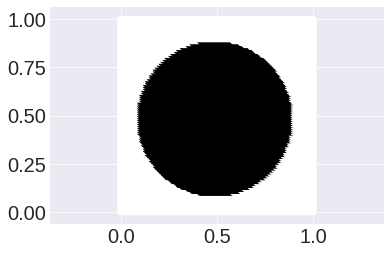

In [25]:
plt.scatter(cis_test_x[:,0], cis_test_x[:,1], c=cis_test_y)
plt.axis('equal')
plt.show()

## Task 3) Implement Multilayer Perceptron (MLP) with softmax activation and cross-entropy loss

Now that we've tested the softmax activation function and cross-entropy loss functions in a single-layer net, let's implement the MLP version.

Much of your work on the single layer net will carry over, so go ahead and copy-paste and modify as needed!

The structure of our MLP will be:

Input layer (X units) -> Hidden layer (Y units) with Rectified Linear activation (ReLu) -> Output layer (Z units) with softmax activation

### a. Implement the following functions in `mlp.py`

- `initialize_wts`
- `accuracy`
- `one_hot`
- `predict`
- `forward`
- `backward`
- `fit`

### b. Test key functions with randomly generated data

In [26]:
from mlp import MLP

In [27]:
# Create a dummy net for debugging
num_inputs = 3
num_features = 6
num_hidden_units = 7
num_classes = 5

net = MLP(num_features, num_hidden_units, num_classes)

In [28]:
# Generate random data and classes
np.random.seed(0)
test_x = np.random.normal(loc=0, scale=100, size=(num_inputs, num_features))
test_y = np.random.uniform(low=0, high=num_classes-1, size=(num_inputs,))
test_y = test_y.astype(int)
print(f'Test input shape: {test_x.shape}')
print(f'Test class vector shape: {test_y.shape}')

Test input shape: (3, 6)
Test class vector shape: (3,)


Test `initialize_wts`

In [29]:
net.initialize_wts(M=num_features, H=num_hidden_units, C=num_classes, std=0.01)
print(f'y wt shape is {net.y_wts.shape} and should be (6, 7)')
print(f'y bias shape is {net.y_b.shape} and should be (7,)')
print(f'z wt shape is {net.z_wts.shape} and should be (7, 5)')
print(f'z bias shape is {net.z_b.shape} and should be (5,)')

print(f'1st few y wts are\n{net.y_wts[:,0]}\nand should be\n[ 0.018 -0.002  0.004  0.007  0.015  0.002]')
print(f'y bias is\n{net.y_b}\nand should be\n[-0.017  0.02  -0.005 -0.004 -0.013  0.008 -0.016]')
print(f'1st few z wts are\n{net.z_wts[:,0]}\nand should be\n[-0.002 -0.    -0.004  0.002  0.001  0.004  0.001]')
print(f'z bias is\n{net.z_b}\nand should be\n[ 0.015  0.019  0.012 -0.002 -0.011]')

y wt shape is (6, 7) and should be (6, 7)
y bias shape is (7,) and should be (7,)
z wt shape is (7, 5) and should be (7, 5)
z bias shape is (5,) and should be (5,)
1st few y wts are
[ 0.018 -0.002  0.004  0.007  0.015  0.002]
and should be
[ 0.018 -0.002  0.004  0.007  0.015  0.002]
y bias is
[-0.017  0.02  -0.005 -0.004 -0.013  0.008 -0.016]
and should be
[-0.017  0.02  -0.005 -0.004 -0.013  0.008 -0.016]
1st few z wts are
[-0.002 -0.    -0.004  0.002  0.001  0.004  0.001]
and should be
[-0.002 -0.    -0.004  0.002  0.001  0.004  0.001]
z bias is
[ 0.015  0.019  0.012 -0.002 -0.011]
and should be
[ 0.015  0.019  0.012 -0.002 -0.011]


Test the `predict` method

In [30]:
test_y_pred = net.predict(test_x)
print(f'Predicted classes are {test_y_pred} and should be [3 0 0]')

Predicted classes are [3 0 0] and should be [3 0 0]


Test the `forward` method focusing on`ReLU`(net act of hidden layer `y`)

In [31]:
_,y_net_act_test,_,_,_ = net.forward(test_x, test_y)

correct_y_act = np.array([[7.66 , 4.47 , 0.804, 9.981, 0.   , 0.   , 0.   ],
       [2.37 , 2.717, 2.18 , 2.552, 0.357, 0.   , 0.   ],
       [3.997, 2.671, 1.195, 3.034, 0.   , 0.   , 0.   ]])

print(f'Your y activation is\n{y_net_act_test}')
print(f'The correct y activation (ReLU) is\n{correct_y_act}')

Your y activation is
[[ 7.643  4.49   0.799  9.977 -0.    -0.    -0.   ]
 [ 2.353  2.737  2.175  2.547  0.345 -0.    -0.   ]
 [ 3.98   2.691  1.19   3.029 -0.    -0.    -0.   ]]
The correct y activation (ReLU) is
[[7.66  4.47  0.804 9.981 0.    0.    0.   ]
 [2.37  2.717 2.18  2.552 0.357 0.    0.   ]
 [3.997 2.671 1.195 3.034 0.    0.    0.   ]]


Test the `forward` method

In [32]:
_,_,_,probs,_ = net.forward(test_x, test_y)

correct_probs = np.array([[0.219, 0.2  , 0.191, 0.219, 0.171],
       [0.208, 0.204, 0.201, 0.205, 0.183],
       [0.208, 0.202, 0.202, 0.205, 0.183]])

print(f'Your z activation (class probabilities) is\n{probs}')
print(f'The correct z activation (class probabilities) is\n{correct_probs}')
print(f'The sums across rows (for each data sample) are {np.sum(probs, axis=1)}.')
print(f'  You should know what should be :)')

Your z activation (class probabilities) is
[[0.219 0.2   0.191 0.219 0.171]
 [0.208 0.204 0.201 0.205 0.183]
 [0.208 0.202 0.202 0.205 0.183]]
The correct z activation (class probabilities) is
[[0.219 0.2   0.191 0.219 0.171]
 [0.208 0.204 0.201 0.205 0.183]
 [0.208 0.202 0.202 0.205 0.183]]
The sums across rows (for each data sample) are [1. 1. 1.].
  You should know what should be :)


Test the `forward` method, focusing on loss

In [33]:
y_in, y_act ,z_in, z_act, loss = net.forward(test_x, test_y)
correct_loss = 1.564402690536365

print(f'Your average loss is\n{loss}')
print(f'The correct average loss is approx\n{correct_loss}')

Your average loss is
1.564402690536365
The correct average loss is approx
1.564402690536365


Test the `forward` method, focusing on regularization

In [34]:
y_in, y_act ,z_in, z_act, loss = net.forward(test_x, test_y, reg=1000)
correct_loss = 5.257207314928798

print(f'Your regularized average loss is\n{loss}')
print(f'The correct regularized average loss is approx\n{correct_loss}')

Your regularized average loss is
5.257207314928798
The correct regularized average loss is approx
5.257207314928798


Test the `backward` method

In [35]:
y_in, y_act ,z_in, z_act, loss = net.forward(test_x, test_y, reg=0.5)
grads = net.backward(test_x, test_y, y_in, y_act ,z_in, z_act, reg=0.5)

print('Your gradient for y_wts is\n', grads[0])
print('Your gradient for y_b is\n', grads[1])
print('Your gradient for z_wts is\n', grads[2])
print('Your gradient for z_b is\n', grads[3])

Your gradient for y_wts is
 [[-0.476  0.057 -0.458 -0.115  0.03  -0.005  0.005]
 [-0.002  0.014 -0.046 -0.162  0.004  0.004  0.001]
 [-0.088  0.038 -0.166 -0.325 -0.001 -0.004 -0.013]
 [-0.331  0.067 -0.398 -0.332  0.001  0.    -0.001]
 [-0.318  0.089 -0.465 -0.615 -0.001 -0.01  -0.002]
 [-0.315 -0.036 -0.036  0.806  0.029 -0.005 -0.007]]
Your gradient for y_b is
 [-0.005  0.    -0.004 -0.     0.     0.     0.   ]
Your gradient for z_wts is
 [[-2.879  0.933  0.131  0.987  0.816]
 [-1.69   0.669 -0.261  0.699  0.584]
 [-0.374  0.278 -0.45   0.284  0.242]
 [-3.221  1.041  0.154  1.111  0.904]
 [ 0.024  0.027 -0.091  0.029  0.015]
 [ 0.002 -0.003 -0.004 -0.003 -0.002]
 [ 0.    -0.006  0.005  0.002 -0.008]]
Your gradient for z_b is
 [-0.455  0.202 -0.135  0.209  0.179]


The correct gradients are:

`
Your gradient for y_wts is
 [[-0.476  0.057 -0.458 -0.115  0.03  -0.005  0.005]
 [-0.002  0.014 -0.046 -0.162  0.004  0.004  0.001]
 [-0.088  0.038 -0.166 -0.325 -0.001 -0.004 -0.013]
 [-0.331  0.067 -0.398 -0.332  0.001  0.    -0.001]
 [-0.318  0.089 -0.465 -0.615 -0.001 -0.01  -0.002]
 [-0.315 -0.036 -0.036  0.806  0.029 -0.005 -0.007]]
Your gradient for y_b is
 [-0.005  0.    -0.004 -0.     0.     0.     0.   ]
Your gradient for z_wts is
 [[-2.879  0.933  0.131  0.987  0.816]
 [-1.69   0.669 -0.261  0.699  0.584]
 [-0.374  0.278 -0.45   0.284  0.242]
 [-3.221  1.041  0.154  1.111  0.904]
 [ 0.024  0.027 -0.091  0.029  0.015]
 [ 0.002 -0.003 -0.004 -0.003 -0.002]
 [ 0.    -0.006  0.005  0.002 -0.008]]
Your gradient for z_b is
 [-0.455  0.202 -0.135  0.209  0.179]
`

Test loss over epoch. 

The below code should generate a curve that rapidly drops to 0 (there might be fluctuations and it might not be monotonic and that's ok)

Starting to train network...There will be 30 epochs and 30 iterations total, 1 iter/epoch.
  Completed iter 0/30. Training loss: 3.78.
Finished training!


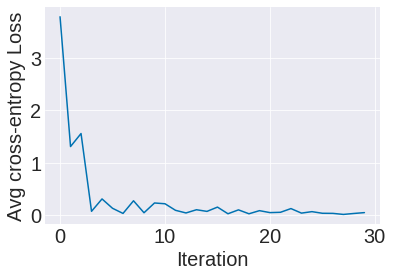

In [36]:
net = MLP(num_features, num_hidden_units, num_classes)
loss, acc_t, acc_v = net.fit(test_x, test_y, test_x, test_y, reg=0, lr=0.001, mini_batch_sz=3, n_epochs=30)

plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Avg cross-entropy Loss')
plt.show()

### c. Test MLP with Circle in Square dataset

First test case where training data = test data.

You should see a nice drop and plateau in loss (after a bunch of print outs).

In [37]:
# train = test
hidden_size = 50
net = MLP(cis_train_x.shape[1], hidden_size, 2)
loss, acc_t, acc_v = net.fit(cis_test_x, cis_test_y, cis_val_x, cis_val_y, reg=0, lr=0.01, mini_batch_sz=100, n_epochs=700)

plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Avg cross-entropy Loss')
plt.show()

Starting to train network...There will be 700 epochs and 70000 iterations total, 100 iter/epoch.
  Completed iter 0/70000. Training loss: 0.70.
  Completed iter 100/70000. Training loss: 0.69.
  Completed iter 200/70000. Training loss: 0.69.
  Completed iter 300/70000. Training loss: 0.69.
  Completed iter 400/70000. Training loss: 0.69.
  Completed iter 500/70000. Training loss: 0.69.
  Completed iter 600/70000. Training loss: 0.69.
  Completed iter 700/70000. Training loss: 0.69.
  Completed iter 800/70000. Training loss: 0.69.
  Completed iter 900/70000. Training loss: 0.69.
  Completed iter 1000/70000. Training loss: 0.69.
  Completed iter 1100/70000. Training loss: 0.69.
  Completed iter 1200/70000. Training loss: 0.69.
  Completed iter 1300/70000. Training loss: 0.69.
  Completed iter 1400/70000. Training loss: 0.69.
  Completed iter 1500/70000. Training loss: 0.69.
  Completed iter 1600/70000. Training loss: 0.69.
  Completed iter 1700/70000. Training loss: 0.68.
  Completed ite

  Completed iter 16100/70000. Training loss: 0.29.
  Completed iter 16200/70000. Training loss: 0.27.
  Completed iter 16300/70000. Training loss: 0.29.
  Completed iter 16400/70000. Training loss: 0.32.
  Completed iter 16500/70000. Training loss: 0.30.
  Completed iter 16600/70000. Training loss: 0.27.
  Completed iter 16700/70000. Training loss: 0.28.
  Completed iter 16800/70000. Training loss: 0.24.
  Completed iter 16900/70000. Training loss: 0.29.
  Completed iter 17000/70000. Training loss: 0.26.
  Completed iter 17100/70000. Training loss: 0.26.
  Completed iter 17200/70000. Training loss: 0.30.
  Completed iter 17300/70000. Training loss: 0.26.
  Completed iter 17400/70000. Training loss: 0.27.
  Completed iter 17500/70000. Training loss: 0.26.
  Completed iter 17600/70000. Training loss: 0.29.
  Completed iter 17700/70000. Training loss: 0.26.
  Completed iter 17800/70000. Training loss: 0.25.
  Completed iter 17900/70000. Training loss: 0.25.
  Completed iter 18000/70000. T

KeyboardInterrupt: 

**TODO**: Run the below cell after training and generate the CIS plot. You should see a well-defined circle inside a square region.

In [ ]:
cis_test_y_pred = net.predict(cis_test_x)
plt.scatter(cis_test_x[:,0], cis_test_x[:,1], c=cis_test_y_pred)
plt.axis('equal')
plt.show()

**Second test case where training data != test data:** You should see a jagged polygon approximation to a circle inside a square region. 

In [ ]:
# train != test
net = MLP(cis_train_x.shape[1], hidden_size, 2)
loss, acc_t, acc_v = net.fit(cis_train_x, cis_train_y, cis_val_x, cis_val_y, reg=0, lr=0.01, mini_batch_sz=len(cis_train_x), n_epochs=10000)

plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Avg cross-entropy Loss')
plt.show()

**TODO**: Run the below cell after training and generate the CIS plot.

In [ ]:
cis_test_y_pred = net.predict(cis_test_x)
plt.scatter(cis_test_x[:,0], cis_test_x[:,1], c=cis_test_y_pred)
plt.axis('equal')
plt.show()

**Question 5**: How do you interpret the circle-in-square results? Do you think the single-layer net (with softmax) can handle the CIS dataset? Why or why not? (You're invited to try it, maybe as an extension :)

**Question 6**: Play with # hidden units, epochs, regularization strength on CIS training...how does each parameter affect the results?

### d. Train on STL-10 dataset, plot performance

Try training the MLP on the below set of hyperparameters

In [ ]:
net = MLP(x_train.shape[1], 100, 10)
loss, acc_t, acc_v = net.fit(x_train, y_train, x_val, y_val,
                             lr=0.05, reg=0.01, mini_batch_sz=500, n_epochs=50, verbose=0)
plt.plot(loss)
plt.xlabel('Training iteration')
plt.ylabel('Avg loss (cross entropy)')
plt.title('STL-10 loss')
plt.show()

In [ ]:
plt.plot(acc_t, label='Training accuracy')
plt.plot(acc_v, label='Validation accuracy')
plt.xlabel('Training iteration')
plt.ylabel('Avg loss (cross entropy)')
plt.title('STL-10 accuracy')
plt.legend()
plt.show()

**Question 7**: What do the above loss and training and validation accuracy curves suggest about the quality of the hyperparameters used during training?

### e. Optimize on STL-10 dataset, plot performance

**TODO** Write code in the cell below to perform a grid search to find the combinations of

- learning rate
- regularization strength
- number hidden units
- mini-batch size

that yields the highest STL-10 validation set accuracy.

You should be able to achieve higher accuracy than in the single layer version of the softmax network.

In [41]:
best_val_acc = 0
best_lr = None
best_reg = None
best_hidden = None
best_mini_batch_sz = None

print(x_train.shape)

def gridSearch(lower_bound=.0001, upper_bound=.099):
    best_val_acc = 0
    accuracy_vals = []
    loss_vals = []
    learning_rates = np.linspace(.078, .078, num=1)
    reg_vals = np.linspace(0, 5, num=1)
    batch_sizes = np.linspace(458, 458, num=1, dtype=int)
    hidden_vals = np.linspace(400, 1000, num = 30, dtype = int)
    
    
#     accuracy_vals.append(0)
    
    count = 0
    for rate in learning_rates:
        count +=1
        for reg_val in reg_vals:
            for hidden in hidden_vals:
                for batch_size in batch_sizes:
                    net = MLP(x_train.shape[1], hidden, 10)
                    loss, acc_t, acc_v = net.fit(x_train, y_train, x_val, y_val, lr=rate, reg=reg_val, 
                                                 mini_batch_sz=batch_size, n_epochs=10, verbose=0)
                    accuracy_vals.append(acc_v)
                    if max(accuracy_vals) <= accuracy_vals[-1]:
                        best_lr = rate
                        best_reg = reg_val
                        best_hidden = hidden
                        best_mini_batch_sz = batch_size 
                        best_val_acc = accuracy_vals[-1]
                print(count)

                print("Best learning rate: ", str(best_lr))
                print("Best regulization value: ", str(best_reg))
                print("Best batch size: ", str(best_mini_batch_sz))
                print("Best hidden val: ", str(best_hidden))
                print(accuracy_vals)
    

gridSearch()

Starting to train network...There will be 7 epochs and 49 iterations total, 7 iter/epoch.
1
Best learning rate:  0.078
Best regulization value:  0.0
Best batch size:  458
Best hidden val:  400
[[0.142, 0.23, 0.266, 0.272, 0.316, 0.316, 0.33]]
Starting to train network...There will be 7 epochs and 49 iterations total, 7 iter/epoch.
1
Best learning rate:  0.078
Best regulization value:  0.0
Best batch size:  458
Best hidden val:  400
[[0.142, 0.23, 0.266, 0.272, 0.316, 0.316, 0.33], [0.134, 0.194, 0.238, 0.256, 0.276, 0.268, 0.278]]
Starting to train network...There will be 7 epochs and 49 iterations total, 7 iter/epoch.
1
Best learning rate:  0.078
Best regulization value:  0.0
Best batch size:  458
Best hidden val:  441
[[0.142, 0.23, 0.266, 0.272, 0.316, 0.316, 0.33], [0.134, 0.194, 0.238, 0.256, 0.276, 0.268, 0.278], [0.154, 0.242, 0.294, 0.308, 0.296, 0.318, 0.322]]
Starting to train network...There will be 7 epochs and 49 iterations total, 7 iter/epoch.
1
Best learning rate:  0.078

1
Best learning rate:  0.078
Best regulization value:  0.0
Best batch size:  458
Best hidden val:  689
[[0.142, 0.23, 0.266, 0.272, 0.316, 0.316, 0.33], [0.134, 0.194, 0.238, 0.256, 0.276, 0.268, 0.278], [0.154, 0.242, 0.294, 0.308, 0.296, 0.318, 0.322], [0.156, 0.244, 0.266, 0.28, 0.28, 0.3, 0.316], [0.15, 0.22, 0.264, 0.274, 0.288, 0.292, 0.304], [0.172, 0.244, 0.266, 0.278, 0.296, 0.306, 0.31], [0.148, 0.232, 0.256, 0.264, 0.29, 0.286, 0.322], [0.176, 0.248, 0.258, 0.304, 0.296, 0.316, 0.35], [0.148, 0.246, 0.262, 0.284, 0.296, 0.304, 0.326], [0.138, 0.24, 0.272, 0.282, 0.296, 0.32, 0.338], [0.174, 0.22, 0.262, 0.262, 0.288, 0.298, 0.304], [0.172, 0.25, 0.286, 0.296, 0.304, 0.304, 0.322], [0.142, 0.238, 0.236, 0.252, 0.28, 0.272, 0.296], [0.17, 0.252, 0.268, 0.278, 0.298, 0.29, 0.296], [0.178, 0.238, 0.29, 0.272, 0.302, 0.296, 0.318], [0.152, 0.228, 0.246, 0.274, 0.278, 0.296, 0.314]]
Starting to train network...There will be 7 epochs and 49 iterations total, 7 iter/epoch.
1
Best le

1
Best learning rate:  0.078
Best regulization value:  0.0
Best batch size:  458
Best hidden val:  689
[[0.142, 0.23, 0.266, 0.272, 0.316, 0.316, 0.33], [0.134, 0.194, 0.238, 0.256, 0.276, 0.268, 0.278], [0.154, 0.242, 0.294, 0.308, 0.296, 0.318, 0.322], [0.156, 0.244, 0.266, 0.28, 0.28, 0.3, 0.316], [0.15, 0.22, 0.264, 0.274, 0.288, 0.292, 0.304], [0.172, 0.244, 0.266, 0.278, 0.296, 0.306, 0.31], [0.148, 0.232, 0.256, 0.264, 0.29, 0.286, 0.322], [0.176, 0.248, 0.258, 0.304, 0.296, 0.316, 0.35], [0.148, 0.246, 0.262, 0.284, 0.296, 0.304, 0.326], [0.138, 0.24, 0.272, 0.282, 0.296, 0.32, 0.338], [0.174, 0.22, 0.262, 0.262, 0.288, 0.298, 0.304], [0.172, 0.25, 0.286, 0.296, 0.304, 0.304, 0.322], [0.142, 0.238, 0.236, 0.252, 0.28, 0.272, 0.296], [0.17, 0.252, 0.268, 0.278, 0.298, 0.29, 0.296], [0.178, 0.238, 0.29, 0.272, 0.302, 0.296, 0.318], [0.152, 0.228, 0.246, 0.274, 0.278, 0.296, 0.314], [0.172, 0.24, 0.248, 0.262, 0.274, 0.308, 0.302], [0.136, 0.25, 0.292, 0.274, 0.29, 0.284, 0.29], [

Starting to train network...There will be 7 epochs and 49 iterations total, 7 iter/epoch.
1
Best learning rate:  0.078
Best regulization value:  0.0
Best batch size:  458
Best hidden val:  896
[[0.142, 0.23, 0.266, 0.272, 0.316, 0.316, 0.33], [0.134, 0.194, 0.238, 0.256, 0.276, 0.268, 0.278], [0.154, 0.242, 0.294, 0.308, 0.296, 0.318, 0.322], [0.156, 0.244, 0.266, 0.28, 0.28, 0.3, 0.316], [0.15, 0.22, 0.264, 0.274, 0.288, 0.292, 0.304], [0.172, 0.244, 0.266, 0.278, 0.296, 0.306, 0.31], [0.148, 0.232, 0.256, 0.264, 0.29, 0.286, 0.322], [0.176, 0.248, 0.258, 0.304, 0.296, 0.316, 0.35], [0.148, 0.246, 0.262, 0.284, 0.296, 0.304, 0.326], [0.138, 0.24, 0.272, 0.282, 0.296, 0.32, 0.338], [0.174, 0.22, 0.262, 0.262, 0.288, 0.298, 0.304], [0.172, 0.25, 0.286, 0.296, 0.304, 0.304, 0.322], [0.142, 0.238, 0.236, 0.252, 0.28, 0.272, 0.296], [0.17, 0.252, 0.268, 0.278, 0.298, 0.29, 0.296], [0.178, 0.238, 0.29, 0.272, 0.302, 0.296, 0.318], [0.152, 0.228, 0.246, 0.274, 0.278, 0.296, 0.314], [0.172, 0

**TODO**: Set the parameters below to the best ones found by your grid search.
- Generate and include the Test STL-10 loss curve
- Generate and include the training and validation accuracy curves in the second cell down.

Adjust the number of training epochs as needed.

In [118]:
print(accuracy_vals)

Starting to train network...There will be 5000 epochs and 165000 iterations total, 33 iter/epoch.
  Completed iter 0/165000. Training loss: 52.76.
  Completed iter 100/165000. Training loss: 50.00.
  Completed iter 200/165000. Training loss: 48.05.
  Completed iter 300/165000. Training loss: 46.16.
  Completed iter 400/165000. Training loss: 44.72.
  Completed iter 500/165000. Training loss: 42.66.
  Completed iter 600/165000. Training loss: 40.96.
  Completed iter 700/165000. Training loss: 39.39.
  Completed iter 800/165000. Training loss: 37.79.
  Completed iter 900/165000. Training loss: 36.52.
  Completed iter 1000/165000. Training loss: 35.27.
  Completed iter 1100/165000. Training loss: 33.64.
  Completed iter 1200/165000. Training loss: 32.76.
  Completed iter 1300/165000. Training loss: 31.43.
  Completed iter 1400/165000. Training loss: 30.14.
  Completed iter 1500/165000. Training loss: 28.99.
  Completed iter 1600/165000. Training loss: 27.94.
  Completed iter 1700/165000. 

  Completed iter 15700/165000. Training loss: 1.46.
  Completed iter 15800/165000. Training loss: 1.40.
  Completed iter 15900/165000. Training loss: 1.50.
  Completed iter 16000/165000. Training loss: 1.34.
  Completed iter 16100/165000. Training loss: 1.59.
  Completed iter 16200/165000. Training loss: 1.43.
  Completed iter 16300/165000. Training loss: 1.34.
  Completed iter 16400/165000. Training loss: 1.36.
  Completed iter 16500/165000. Training loss: 1.36.
  Completed iter 16600/165000. Training loss: 1.59.
  Completed iter 16700/165000. Training loss: 1.66.
  Completed iter 16800/165000. Training loss: 1.32.
  Completed iter 16900/165000. Training loss: 1.78.
  Completed iter 17000/165000. Training loss: 1.44.
  Completed iter 17100/165000. Training loss: 1.39.
  Completed iter 17200/165000. Training loss: 1.49.
  Completed iter 17300/165000. Training loss: 1.27.
  Completed iter 17400/165000. Training loss: 1.51.
  Completed iter 17500/165000. Training loss: 1.46.
  Completed 

  Completed iter 31500/165000. Training loss: 1.42.
  Completed iter 31600/165000. Training loss: 1.35.
  Completed iter 31700/165000. Training loss: 1.28.
  Completed iter 31800/165000. Training loss: 1.24.
  Completed iter 31900/165000. Training loss: 1.42.
  Completed iter 32000/165000. Training loss: 1.26.
  Completed iter 32100/165000. Training loss: 1.35.
  Completed iter 32200/165000. Training loss: 1.34.
  Completed iter 32300/165000. Training loss: 1.32.
  Completed iter 32400/165000. Training loss: 1.43.
  Completed iter 32500/165000. Training loss: 1.31.
  Completed iter 32600/165000. Training loss: 1.27.
  Completed iter 32700/165000. Training loss: 1.30.
  Completed iter 32800/165000. Training loss: 1.46.
  Completed iter 32900/165000. Training loss: 1.38.
  Completed iter 33000/165000. Training loss: 1.21.
  Completed iter 33100/165000. Training loss: 1.27.
  Completed iter 33200/165000. Training loss: 1.25.
  Completed iter 33300/165000. Training loss: 1.22.
  Completed 

  Completed iter 47300/165000. Training loss: 1.28.
  Completed iter 47400/165000. Training loss: 1.17.
  Completed iter 47500/165000. Training loss: 1.25.
  Completed iter 47600/165000. Training loss: 1.34.
  Completed iter 47700/165000. Training loss: 1.31.
  Completed iter 47800/165000. Training loss: 1.40.
  Completed iter 47900/165000. Training loss: 1.28.
  Completed iter 48000/165000. Training loss: 1.24.
  Completed iter 48100/165000. Training loss: 1.28.
  Completed iter 48200/165000. Training loss: 1.23.
  Completed iter 48300/165000. Training loss: 1.55.
  Completed iter 48400/165000. Training loss: 1.33.
  Completed iter 48500/165000. Training loss: 1.35.
  Completed iter 48600/165000. Training loss: 1.42.
  Completed iter 48700/165000. Training loss: 1.24.
  Completed iter 48800/165000. Training loss: 1.41.
  Completed iter 48900/165000. Training loss: 1.29.
  Completed iter 49000/165000. Training loss: 1.25.
  Completed iter 49100/165000. Training loss: 1.30.
  Completed 

  Completed iter 63100/165000. Training loss: 1.39.
  Completed iter 63200/165000. Training loss: 1.30.
  Completed iter 63300/165000. Training loss: 1.31.
  Completed iter 63400/165000. Training loss: 1.39.
  Completed iter 63500/165000. Training loss: 1.44.
  Completed iter 63600/165000. Training loss: 1.28.
  Completed iter 63700/165000. Training loss: 1.37.
  Completed iter 63800/165000. Training loss: 1.34.
  Completed iter 63900/165000. Training loss: 1.25.
  Completed iter 64000/165000. Training loss: 1.31.
  Completed iter 64100/165000. Training loss: 1.18.
  Completed iter 64200/165000. Training loss: 1.32.
  Completed iter 64300/165000. Training loss: 1.32.
  Completed iter 64400/165000. Training loss: 1.30.
  Completed iter 64500/165000. Training loss: 1.23.
  Completed iter 64600/165000. Training loss: 1.30.
  Completed iter 64700/165000. Training loss: 1.28.
  Completed iter 64800/165000. Training loss: 1.33.
  Completed iter 64900/165000. Training loss: 1.45.
  Completed 

  Completed iter 78900/165000. Training loss: 1.41.
  Completed iter 79000/165000. Training loss: 1.25.
  Completed iter 79100/165000. Training loss: 1.28.
  Completed iter 79200/165000. Training loss: 1.33.
  Completed iter 79300/165000. Training loss: 1.29.
  Completed iter 79400/165000. Training loss: 1.18.
  Completed iter 79500/165000. Training loss: 1.36.
  Completed iter 79600/165000. Training loss: 1.35.
  Completed iter 79700/165000. Training loss: 1.26.
  Completed iter 79800/165000. Training loss: 1.35.
  Completed iter 79900/165000. Training loss: 1.28.
  Completed iter 80000/165000. Training loss: 1.23.
  Completed iter 80100/165000. Training loss: 1.16.
  Completed iter 80200/165000. Training loss: 1.19.
  Completed iter 80300/165000. Training loss: 1.33.
  Completed iter 80400/165000. Training loss: 1.31.
  Completed iter 80500/165000. Training loss: 1.38.
  Completed iter 80600/165000. Training loss: 1.29.
  Completed iter 80700/165000. Training loss: 1.32.
  Completed 

  Completed iter 94700/165000. Training loss: 1.20.
  Completed iter 94800/165000. Training loss: 1.31.
  Completed iter 94900/165000. Training loss: 1.29.
  Completed iter 95000/165000. Training loss: 1.23.
  Completed iter 95100/165000. Training loss: 1.29.
  Completed iter 95200/165000. Training loss: 1.42.
  Completed iter 95300/165000. Training loss: 1.19.
  Completed iter 95400/165000. Training loss: 1.28.
  Completed iter 95500/165000. Training loss: 1.25.
  Completed iter 95600/165000. Training loss: 1.40.
  Completed iter 95700/165000. Training loss: 1.31.
  Completed iter 95800/165000. Training loss: 1.26.
  Completed iter 95900/165000. Training loss: 1.31.
  Completed iter 96000/165000. Training loss: 1.23.
  Completed iter 96100/165000. Training loss: 1.34.
  Completed iter 96200/165000. Training loss: 1.33.
  Completed iter 96300/165000. Training loss: 1.17.
  Completed iter 96400/165000. Training loss: 1.35.
  Completed iter 96500/165000. Training loss: 1.36.
  Completed 

  Completed iter 110300/165000. Training loss: 1.17.
  Completed iter 110400/165000. Training loss: 1.22.
  Completed iter 110500/165000. Training loss: 1.27.
  Completed iter 110600/165000. Training loss: 1.28.
  Completed iter 110700/165000. Training loss: 1.29.
  Completed iter 110800/165000. Training loss: 1.23.
  Completed iter 110900/165000. Training loss: 1.27.
  Completed iter 111000/165000. Training loss: 1.26.
  Completed iter 111100/165000. Training loss: 1.31.
  Completed iter 111200/165000. Training loss: 1.31.
  Completed iter 111300/165000. Training loss: 1.34.
  Completed iter 111400/165000. Training loss: 1.21.
  Completed iter 111500/165000. Training loss: 1.35.
  Completed iter 111600/165000. Training loss: 1.26.
  Completed iter 111700/165000. Training loss: 1.29.
  Completed iter 111800/165000. Training loss: 1.38.
  Completed iter 111900/165000. Training loss: 1.21.
  Completed iter 112000/165000. Training loss: 1.35.
  Completed iter 112100/165000. Training loss:

  Completed iter 125800/165000. Training loss: 1.32.
  Completed iter 125900/165000. Training loss: 1.19.
  Completed iter 126000/165000. Training loss: 1.28.
  Completed iter 126100/165000. Training loss: 1.17.
  Completed iter 126200/165000. Training loss: 1.20.
  Completed iter 126300/165000. Training loss: 1.36.
  Completed iter 126400/165000. Training loss: 1.28.
  Completed iter 126500/165000. Training loss: 1.38.
  Completed iter 126600/165000. Training loss: 1.30.
  Completed iter 126700/165000. Training loss: 1.25.
  Completed iter 126800/165000. Training loss: 1.40.
  Completed iter 126900/165000. Training loss: 1.29.
  Completed iter 127000/165000. Training loss: 1.22.
  Completed iter 127100/165000. Training loss: 1.30.
  Completed iter 127200/165000. Training loss: 1.26.
  Completed iter 127300/165000. Training loss: 1.29.
  Completed iter 127400/165000. Training loss: 1.35.
  Completed iter 127500/165000. Training loss: 1.28.
  Completed iter 127600/165000. Training loss:

  Completed iter 141300/165000. Training loss: 1.18.
  Completed iter 141400/165000. Training loss: 1.28.
  Completed iter 141500/165000. Training loss: 1.32.
  Completed iter 141600/165000. Training loss: 1.26.
  Completed iter 141700/165000. Training loss: 1.26.
  Completed iter 141800/165000. Training loss: 1.35.
  Completed iter 141900/165000. Training loss: 1.27.
  Completed iter 142000/165000. Training loss: 1.29.
  Completed iter 142100/165000. Training loss: 1.28.
  Completed iter 142200/165000. Training loss: 1.29.
  Completed iter 142300/165000. Training loss: 1.32.
  Completed iter 142400/165000. Training loss: 1.31.
  Completed iter 142500/165000. Training loss: 1.24.
  Completed iter 142600/165000. Training loss: 1.16.
  Completed iter 142700/165000. Training loss: 1.57.
  Completed iter 142800/165000. Training loss: 1.24.
  Completed iter 142900/165000. Training loss: 1.31.
  Completed iter 143000/165000. Training loss: 1.26.
  Completed iter 143100/165000. Training loss:

  Completed iter 156800/165000. Training loss: 1.30.
  Completed iter 156900/165000. Training loss: 1.23.
  Completed iter 157000/165000. Training loss: 1.17.
  Completed iter 157100/165000. Training loss: 1.15.
  Completed iter 157200/165000. Training loss: 1.13.
  Completed iter 157300/165000. Training loss: 1.28.
  Completed iter 157400/165000. Training loss: 1.30.
  Completed iter 157500/165000. Training loss: 1.40.
  Completed iter 157600/165000. Training loss: 1.25.
  Completed iter 157700/165000. Training loss: 1.53.
  Completed iter 157800/165000. Training loss: 1.19.
  Completed iter 157900/165000. Training loss: 1.21.
  Completed iter 158000/165000. Training loss: 1.25.
  Completed iter 158100/165000. Training loss: 1.37.
  Completed iter 158200/165000. Training loss: 1.30.
  Completed iter 158300/165000. Training loss: 1.36.
  Completed iter 158400/165000. Training loss: 1.22.
  Completed iter 158500/165000. Training loss: 1.18.
  Completed iter 158600/165000. Training loss:

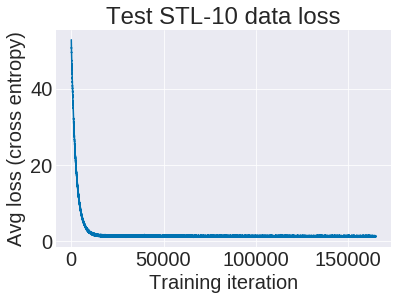

In [43]:
# Train the net with the bestparam settings
best_lr = .004
best_reg = .05
best_hidden = 65
best_mini_batch_sz = 15

bestNet = MLP(x_train.shape[1], best_hidden, 10)
loss, acc_t, acc_v = bestNet.fit(x_test, y_test, x_val, y_val,
                                 lr=best_lr, reg=best_reg, mini_batch_sz=best_mini_batch_sz, n_epochs=5000, verbose=1)
plt.plot(loss)
plt.xlabel('Training iteration')
plt.ylabel('Avg loss (cross entropy)')
plt.title('Test STL-10 data loss')
plt.show()

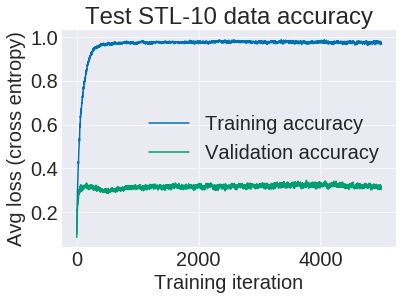

In [44]:
plt.plot(acc_t, label='Training accuracy')
plt.plot(acc_v, label='Validation accuracy')
plt.xlabel('Training iteration')
plt.ylabel('Avg loss (cross entropy)')
plt.title('Test STL-10 data accuracy')
plt.legend()
plt.show()

### e. Visualize learned weights

**TODO**: 

- In the cell below, get the weights of your best net's hidden layer (Y), reshape/transpose them so that they are `(N, 32, 32, 3)`.
- Run the `plot_weights` function to generate a grid visualization of them.

In [48]:
best_y_wts = bestNet.get_y_wts()
best_y_wts = best_y_wts.T.reshape(best_y_wts.T.shape[0],32,32,3)



In [49]:
def plot_weights(wts):
    grid_sz = int(np.sqrt(len(wts)))
    plt.figure(figsize=(20,20))
    for x in range(grid_sz):
        for y in range(grid_sz):
            lin_ind = np.ravel_multi_index((x, y), dims=(grid_sz, grid_sz))
            plt.subplot(grid_sz, grid_sz, lin_ind+1)
            currImg = wts[lin_ind]
            low, high = np.min(currImg), np.max(currImg)
            currImg = 255*(currImg - low) / (high - low)
            currImg = currImg.astype('uint8')
            plt.imshow(currImg)
            plt.gca().axis('off')
    plt.show()

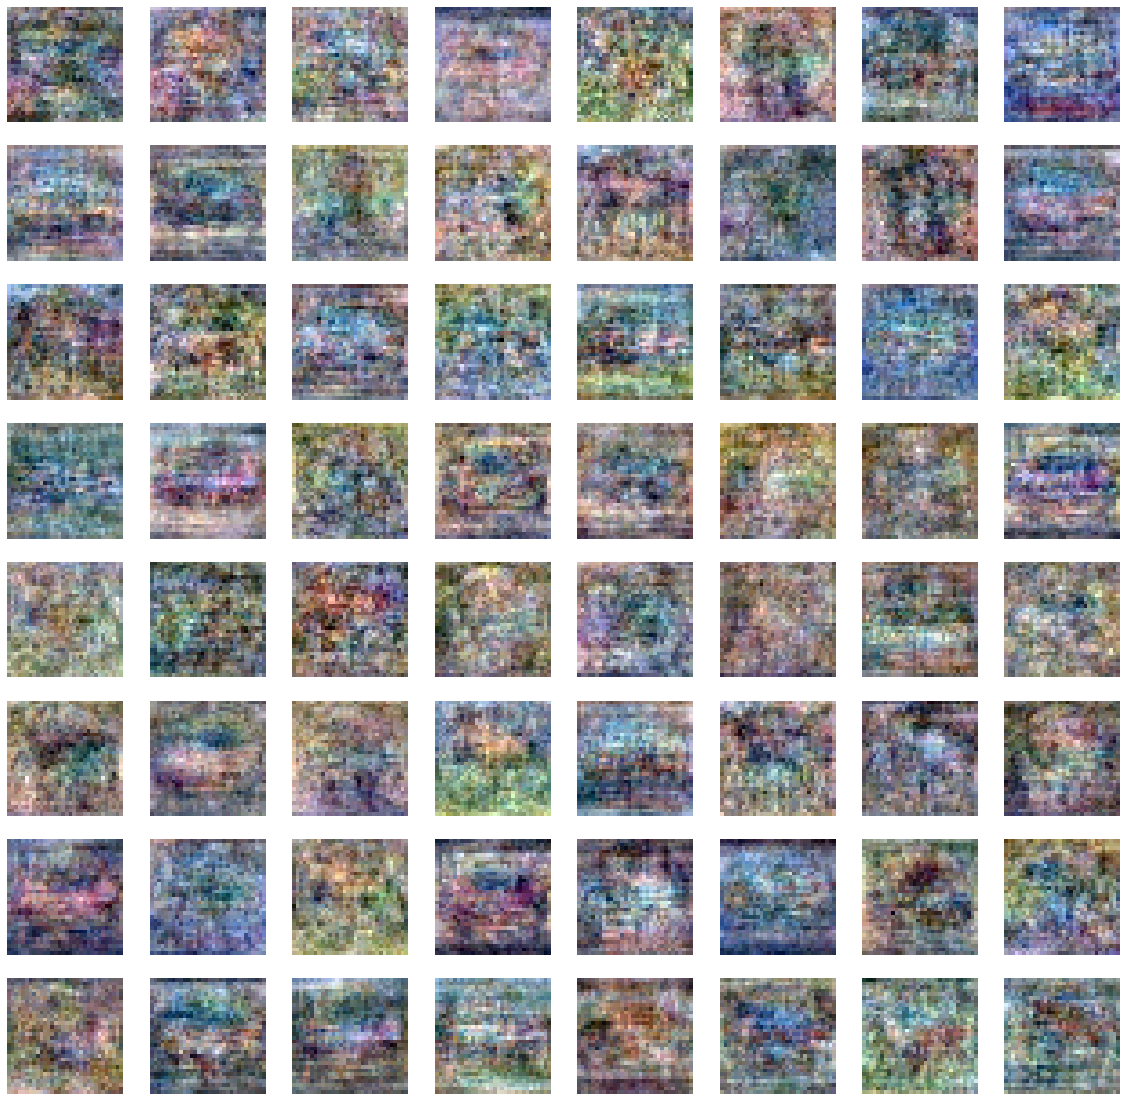

In [50]:
plot_weights(best_y_wts)

## Extensions

**Reminder**: Please do not integrate extensions into your base project so that it changes the expected behavior of core functions. It is better to duplicate the base project and add features from there.

1) Instead of computing the loss over a mini-batch, compute it over epochs instead. Compare and contrast the approaches. Be sure to include analysis figures.

2) Investigate how the single layer softmax network does with the CIS dataset. Explain and provide plots showing your results.

3) If you have time to spare (or want to throw more computing power at the STL-10 dataset), process through the SLP and MLP and tune hyperparameters with the dataset at its original resolution (96x96 images). Show images of your learned weights. Can you find a training sweet spot where the learned weight visualizations look particularly cool?

4) Implement the sigmoid classifer (same network structure, except use sigmoid for netact) with the cross-entropy loss by creating another subclass of `SingleLayerNet` and/or `MLP`. Compare and contrast results achieved by the softmax/cross-entropy network.

5) Explore the effects of batch gradient descent, stochastic gradient descent, and mini-batch gradient descent.

6) Obtain, preprocess, train, and evaluate the performance of `SingleLayerNet` and/or `MLP` on another dataset with comparable types of image features. 

## Extension 1
We took on the first suggested extension and tried out a few different values for the number of samples in a mini-batch. First, we made the size of a mini batch equal to the size of an epoch. This was horribly ineffective. Our training started at

Starting to train network...There will be 70000 epochs and 70000 iterations total, 1 iter/epoch.
  Completed iter 0/70000. Training loss: 0.70.
  Completed iter 100/70000. Training loss: 0.69.
  Completed iter 200/70000. Training loss: 0.69.
  Completed iter 300/70000. Training loss: 0.69.
  Completed iter 400/70000. Training loss: 0.69.
  Completed iter 500/70000. Training loss: 0.69.
  Completed iter 600/70000. Training loss: 0.69.
  Completed iter 700/70000. Training loss: 0.69.
  Completed iter 800/70000. Training loss: 0.69.
  Completed iter 900/70000. Training loss: 0.69.
  Completed iter 1000/70000. Training loss: 0.69.
  Completed iter 1100/70000. Training loss: 0.69.
  Completed iter 1200/70000. Training loss: 0.69.
  Completed iter 1300/70000. Training loss: 0.69.
  Completed iter 1400/70000. Training loss: 0.69.
  Completed iter 1500/70000. Training loss: 0.69.
  Completed iter 1600/70000. Training loss: 0.69.
  Completed iter 1700/70000. Training loss: 0.69.
  Completed ite

  Completed iter 16100/70000. Training loss: 0.29.
  Completed iter 16200/70000. Training loss: 0.29.
  Completed iter 16300/70000. Training loss: 0.29.
  Completed iter 16400/70000. Training loss: 0.29.
  Completed iter 16500/70000. Training loss: 0.28.
  Completed iter 16600/70000. Training loss: 0.28.
  Completed iter 16700/70000. Training loss: 0.28.
  Completed iter 16800/70000. Training loss: 0.28.
  Completed iter 16900/70000. Training loss: 0.27.
  Completed iter 17000/70000. Training loss: 0.27.
  Completed iter 17100/70000. Training loss: 0.27.
  Completed iter 17200/70000. Training loss: 0.27.
  Completed iter 17300/70000. Training loss: 0.26.
  Completed iter 17400/70000. Training loss: 0.26.
  Completed iter 17500/70000. Training loss: 0.27.
  Completed iter 17600/70000. Training loss: 0.26.
  Completed iter 17700/70000. Training loss: 0.26.
  Completed iter 17800/70000. Training loss: 0.26.
  Completed iter 17900/70000. Training loss: 0.26.
  Completed iter 18000/70000. T

  Completed iter 32200/70000. Training loss: 0.14.
  Completed iter 32300/70000. Training loss: 0.14.
  Completed iter 32400/70000. Training loss: 0.14.
  Completed iter 32500/70000. Training loss: 0.14.
  Completed iter 32600/70000. Training loss: 0.14.
  Completed iter 32700/70000. Training loss: 0.14.
  Completed iter 32800/70000. Training loss: 0.14.
  Completed iter 32900/70000. Training loss: 0.14.
  Completed iter 33000/70000. Training loss: 0.14.
  Completed iter 33100/70000. Training loss: 0.13.
  Completed iter 33200/70000. Training loss: 0.13.
  Completed iter 33300/70000. Training loss: 0.13.
  Completed iter 33400/70000. Training loss: 0.13.
  Completed iter 33500/70000. Training loss: 0.13.
  Completed iter 33600/70000. Training loss: 0.13.
  Completed iter 33700/70000. Training loss: 0.13.
  Completed iter 33800/70000. Training loss: 0.13.
  Completed iter 33900/70000. Training loss: 0.13.
  Completed iter 34000/70000. Training loss: 0.13.
  Completed iter 34100/70000. T

  Completed iter 48300/70000. Training loss: 0.10.
  Completed iter 48400/70000. Training loss: 0.10.
  Completed iter 48500/70000. Training loss: 0.10.
  Completed iter 48600/70000. Training loss: 0.10.
  Completed iter 48700/70000. Training loss: 0.10.
  Completed iter 48800/70000. Training loss: 0.10.
  Completed iter 48900/70000. Training loss: 0.10.
  Completed iter 49000/70000. Training loss: 0.10.
  Completed iter 49100/70000. Training loss: 0.10.
  Completed iter 49200/70000. Training loss: 0.09.
  Completed iter 49300/70000. Training loss: 0.10.
  Completed iter 49400/70000. Training loss: 0.10.
  Completed iter 49500/70000. Training loss: 0.10.
  Completed iter 49600/70000. Training loss: 0.10.
  Completed iter 49700/70000. Training loss: 0.10.
  Completed iter 49800/70000. Training loss: 0.10.
  Completed iter 49900/70000. Training loss: 0.10.
  Completed iter 50000/70000. Training loss: 0.10.
  Completed iter 50100/70000. Training loss: 0.10.
  Completed iter 50200/70000. T

  Completed iter 64400/70000. Training loss: 0.08.
  Completed iter 64500/70000. Training loss: 0.08.
  Completed iter 64600/70000. Training loss: 0.08.
  Completed iter 64700/70000. Training loss: 0.08.
  Completed iter 64800/70000. Training loss: 0.08.
  Completed iter 64900/70000. Training loss: 0.08.
  Completed iter 65000/70000. Training loss: 0.08.
  Completed iter 65100/70000. Training loss: 0.08.
  Completed iter 65200/70000. Training loss: 0.08.
  Completed iter 65300/70000. Training loss: 0.08.
  Completed iter 65400/70000. Training loss: 0.08.
  Completed iter 65500/70000. Training loss: 0.08.
  Completed iter 65600/70000. Training loss: 0.08.
  Completed iter 65700/70000. Training loss: 0.08.
  Completed iter 65800/70000. Training loss: 0.08.
  Completed iter 65900/70000. Training loss: 0.08.
  Completed iter 66000/70000. Training loss: 0.08.
  Completed iter 66100/70000. Training loss: 0.08.
  Completed iter 66200/70000. Training loss: 0.08.
  Completed iter 66300/70000. T

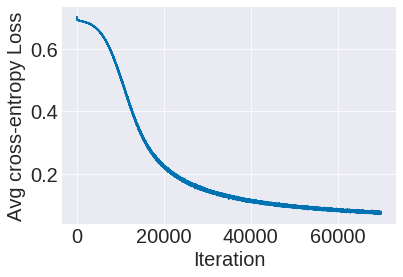

In [38]:
hidden_size = 50
net = MLP(cis_train_x.shape[1], hidden_size, 2)
loss, acc_t, acc_v = net.fit(cis_test_x, cis_test_y, cis_val_x, cis_val_y, reg=0, lr=0.01, mini_batch_sz=cis_test_x.shape[0], n_epochs=70000)

plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Avg cross-entropy Loss')
plt.show()

Starting to train network...There will be 5 epochs and 50000 iterations total, 10000 iter/epoch.
  Completed iter 0/50000. Training loss: 0.83.
  Completed iter 100/50000. Training loss: 0.69.
  Completed iter 200/50000. Training loss: 0.66.
  Completed iter 300/50000. Training loss: 0.62.
  Completed iter 400/50000. Training loss: 0.65.
  Completed iter 500/50000. Training loss: 0.57.
  Completed iter 600/50000. Training loss: 0.62.
  Completed iter 700/50000. Training loss: 0.60.
  Completed iter 800/50000. Training loss: 0.67.
  Completed iter 900/50000. Training loss: 0.70.
  Completed iter 1000/50000. Training loss: 0.61.
  Completed iter 1100/50000. Training loss: 0.64.
  Completed iter 1200/50000. Training loss: 0.75.
  Completed iter 1300/50000. Training loss: 0.71.
  Completed iter 1400/50000. Training loss: 0.65.
  Completed iter 1500/50000. Training loss: 0.71.
  Completed iter 1600/50000. Training loss: 0.82.
  Completed iter 1700/50000. Training loss: 0.72.
  Completed ite

  Completed iter 17000/50000. Training loss: 0.33.
  Completed iter 17100/50000. Training loss: 0.68.
  Completed iter 17200/50000. Training loss: 0.23.
  Completed iter 17300/50000. Training loss: 0.22.
  Completed iter 17400/50000. Training loss: 0.18.
  Completed iter 17500/50000. Training loss: 0.33.
  Completed iter 17600/50000. Training loss: 0.02.
  Completed iter 17700/50000. Training loss: 0.20.
  Completed iter 17800/50000. Training loss: 0.32.
  Completed iter 17900/50000. Training loss: 0.30.
  Completed iter 18000/50000. Training loss: 0.43.
  Completed iter 18100/50000. Training loss: 0.72.
  Completed iter 18200/50000. Training loss: 0.15.
  Completed iter 18300/50000. Training loss: 0.05.
  Completed iter 18400/50000. Training loss: 0.24.
  Completed iter 18500/50000. Training loss: 0.02.
  Completed iter 18600/50000. Training loss: 0.73.
  Completed iter 18700/50000. Training loss: 0.37.
  Completed iter 18800/50000. Training loss: 0.02.
  Completed iter 18900/50000. T

  Completed iter 34300/50000. Training loss: 0.24.
  Completed iter 34400/50000. Training loss: 0.03.
  Completed iter 34500/50000. Training loss: 0.22.
  Completed iter 34600/50000. Training loss: 0.09.
  Completed iter 34700/50000. Training loss: 0.04.
  Completed iter 34800/50000. Training loss: 0.10.
  Completed iter 34900/50000. Training loss: 0.01.
  Completed iter 35000/50000. Training loss: 0.02.
  Completed iter 35100/50000. Training loss: 0.00.
  Completed iter 35200/50000. Training loss: 0.00.
  Completed iter 35300/50000. Training loss: 0.10.
  Completed iter 35400/50000. Training loss: 0.00.
  Completed iter 35500/50000. Training loss: 0.14.
  Completed iter 35600/50000. Training loss: 0.00.
  Completed iter 35700/50000. Training loss: 0.00.
  Completed iter 35800/50000. Training loss: 0.74.
  Completed iter 35900/50000. Training loss: 0.07.
  Completed iter 36000/50000. Training loss: 0.17.
  Completed iter 36100/50000. Training loss: 0.02.
  Completed iter 36200/50000. T

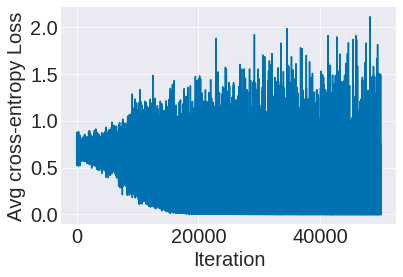

In [39]:
hidden_size = 50
net = MLP(cis_train_x.shape[1], hidden_size, 2)
loss, acc_t, acc_v = net.fit(cis_test_x, cis_test_y, cis_val_x, cis_val_y, reg=0, lr=0.01, mini_batch_sz=1, n_epochs=5)

plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Avg cross-entropy Loss')
plt.show()

In [ ]:
hidden_size = 50
net = MLP(cis_train_x.shape[1], hidden_size, 2)
loss, acc_t, acc_v = net.fit(cis_test_x, cis_test_y, cis_val_x, cis_val_y, reg=0, lr=0.01, mini_batch_sz=100, n_epochs=700)

plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Avg cross-entropy Loss')
plt.show()

## Extension 2
In extension 2, we investigate how the single layer network performs on the CIS dataset

In [ ]:
net = SingleLayerNetSoftmax()
best_loss = bestNet.fit(cis_train_x, cis_train_y,
            lr=best_lr, reg=best_reg, mini_batch_sz=best_batch, n_epochs=300, verbose=2)
y_test_pred = bestNet.predict(x_test)
print('y_test_pred',y_test_pred.shape, y_test_pred.sum())
test_acc = bestNet.accuracy(y_test, y_test_pred)

print(f'Test accuracy {test_acc}')
plt.plot(best_loss)
plt.show()
